# Two-dimensional quantum dot in a harmonic oscillator potential subject to a laser field.

In this notebook we repeat the experiment from the notebook `2d-ho-quantum-dot.ipynb`, but now we use the OACCD/NOCCD groundstate calculations as our initial state for the OATDCCD calculations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from quantum_systems import TwoDimensionalHarmonicOscillator
from quantum_systems.time_evolution_operators import LaserField
from coupled_cluster.ccd import OATDCCD
from coupled_cluster.integrators import GaussIntegrator

In [2]:
class LaserPulse:

    def __init__(self, t_0=0, t_final=10, omega=8, strength=0.03):
        self.t_0 = t_0
        self.t_final = t_final
        self.omega = omega
        self.strength = strength

    def __call__(self, t):
        return self.strength * np.sin(self.omega * t)

In [3]:
n = 2
l = 12

radius = 8
num_grid_points = 401
omega = 0.4
mass = 1

tdho = TwoDimensionalHarmonicOscillator(n, l, radius, num_grid_points, omega=omega, mass=mass)
tdho.setup_system()
tdho.change_to_hf_basis(verbose=True, tolerance=1e-8)

HF converged to given precision in 7 iterations
Ehf: (1.508042133904092+0j)


In [4]:
polarization_vector = np.zeros(2)
polarization_vector[1] = 1/np.sqrt(2)
polarization_vector[1] = 1/np.sqrt(2)

laser = LaserField(
    LaserPulse(omega=8*omega, strength=1),
    polarization_vector=polarization_vector
)

tdho.set_time_evolution_operator(laser)

In [5]:
integrator = GaussIntegrator(np=np, eps=1e-10)
oatdccd = OATDCCD(tdho, np=np, integrator=integrator, verbose=True)

oatdccd.compute_ground_state()
print("Ground state energy: {0}".format(oatdccd.compute_ground_state_energy()))

Iteration: 0	Residuals (t): [0.16876184478565645]
Iteration: 1	Residuals (t): [0.07070740261132703]
Iteration: 0	Residuals (l): [0.13833266105637007]
Iteration: 1	Residuals (l): [0.05594710909889833]

Iteration: 0

Residual norms: rd = 0.016680195878198755
Residual norms: ru = 0.016737887391758823
Iteration: 0	Residuals (t): [0.006709186392687117]
Iteration: 1	Residuals (t): [0.002552264592048184]
Iteration: 2	Residuals (t): [0.000481830569976514]
Iteration: 0	Residuals (l): [0.004540809959274987]
Iteration: 1	Residuals (l): [0.0012928631677019823]

Iteration: 1

Residual norms: rd = 0.0007153832234638956
Residual norms: ru = 0.0006786538493007349
Iteration: 0	Residuals (t): [0.00015446762088870507]
Iteration: 1	Residuals (t): [4.410972162893951e-06]
Iteration: 0	Residuals (l): [0.00022714690259861047]
Iteration: 1	Residuals (l): [6.238324861469231e-05]
Changing system basis...
Ground state energy: (1.392853697855261+0j)


In [9]:
# TODO: The ground state particle density is _not_ coreect for the
# OACCD ground state. Make sure that the transformed basis is used.
rho = oatdccd.compute_ground_state_particle_density()

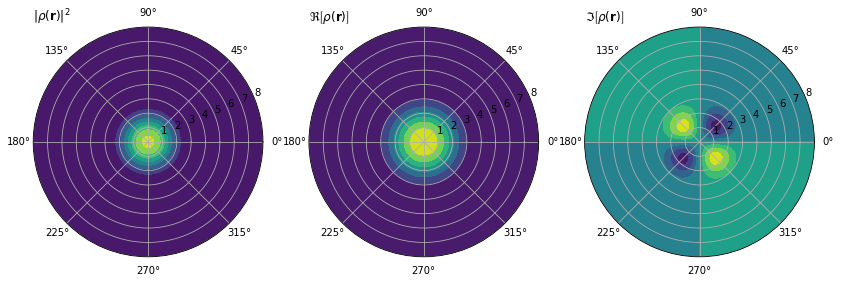

In [7]:
fig = plt.figure(figsize=(14, 10))

ax = fig.add_subplot(1, 3, 1, polar=True)
ax.set_title(r"$|\rho(\mathbf{r})|^2$", loc="left")
plt.contourf(tdho.T, tdho.R, np.abs(rho * rho.conj()))

ax = fig.add_subplot(1, 3, 2, polar=True)
ax.set_title(r"$\Re\left[\rho(\mathbf{r})\right]$", loc="left")
plt.contourf(tdho.T, tdho.R, rho.real)

ax = fig.add_subplot(1, 3, 3, polar=True)
ax.set_title(r"$\Im\left[\rho(\mathbf{r})\right]$", loc="left")
plt.contourf(tdho.T, tdho.R, rho.imag)
plt.show()